# Global Power Plant Database

In [1]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv("globalpowerplant.csv")

In [3]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis (EDA)

In [4]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [5]:
df.shape #to check the shape of the data

(907, 27)

In [6]:
# Lets check for null values and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [8]:
df.isnull().sum().sort_values(ascending=False)

estimated_generation_gwh    907
other_fuel3                 907
wepp_id                     907
generation_gwh_2013         907
generation_gwh_2019         907
other_fuel2                 906
other_fuel1                 709
owner                       565
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_data_source      458
year_of_capacity_data       388
commissioning_year          380
latitude                     46
longitude                    46
geolocation_source           19
country                       0
url                           0
country_long                  0
primary_fuel                  0
capacity_mw                   0
gppd_idnr                     0
name                          0
source                        0
dtype: int64

In [9]:
df.dtypes.sort_values(ascending=False)

country                      object
other_fuel1                  object
generation_data_source       object
geolocation_source           object
url                          object
country_long                 object
owner                        object
other_fuel2                  object
source                       object
primary_fuel                 object
name                         object
gppd_idnr                    object
generation_gwh_2014         float64
generation_gwh_2019         float64
generation_gwh_2018         float64
generation_gwh_2017         float64
generation_gwh_2016         float64
generation_gwh_2015         float64
generation_gwh_2013         float64
other_fuel3                 float64
year_of_capacity_data       float64
wepp_id                     float64
capacity_mw                 float64
latitude                    float64
longitude                   float64
commissioning_year          float64
estimated_generation_gwh    float64
dtype: object

In [10]:
df.nunique().to_frame("Unique Values")

,Unique Values
country,1
country_long,1
name,907
gppd_idnr,907
capacity_mw,361
latitude,836
longitude,827
primary_fuel,8
other_fuel1,3
other_fuel2,1


#### With the help of nunique method we were able to check the unique data information present in our dataset columns.Now observing the columns "country" and "country_long" we can see that it only has 1 unique data filled in all 908 rows and does not provide any insight so it can be deleted. Similarly, the column "year_of_capacity_data" 


#### Write down the names of columns that we will need to remove are:



In [11]:
#country,country_long,year_of_capacity_data,name,gppd_idnr,url

In [12]:
df.drop(["country", "country_long", "year_of_capacity_data", "name", "gppd_idnr", "url"], axis=1, inplace=True)

In [17]:
df.drop(["other_fuel1", "other_fuel2", "other_fuel3", "owner", "wepp_id", "generation_gwh_2013",
        "generation_gwh_2014", "generation_gwh_2015", "generation_gwh_2016", "generation_gwh_2017",
        "generation_data_source", "estimated_generation_gwh"], axis=1,inplace=True)

#### Dropped all the column that had more than 50% of missing data since it made no sense to treat such a huge chunk of missing value and ultimately make our model biased towards those missing value treated data.

In [19]:
print(df.shape)
df.head()

(907, 9)


,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2018,generation_gwh_2019
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,626.239128,NaN
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,7279.000000,NaN


#### Now our new dataset has 907 rows and 7 columns.

In [21]:
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2018    459
generation_gwh_2019    907
dtype: int64

#### We have missing values present in our dataset columns that will need to be treated now. But before that we will separate our categorical columns and numerical columns so that application of meand and mode will become easier.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   capacity_mw               907 non-null    float64
 1   latitude                  861 non-null    float64
 2   longitude                 861 non-null    float64
 3   primary_fuel              907 non-null    object 
 4   other_fuel1               198 non-null    object 
 5   other_fuel2               1 non-null      object 
 6   other_fuel3               0 non-null      float64
 7   commissioning_year        527 non-null    float64
 8   owner                     342 non-null    object 
 9   source                    907 non-null    object 
 10  geolocation_source        888 non-null    object 
 11  wepp_id                   0 non-null      float64
 12  generation_gwh_2013       0 non-null      float64
 13  generation_gwh_2014       398 non-null    float64
 14  generation

In [45]:
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        object_datatype.append(x)
print(f"Object Data Type Columns are: ", object_datatype)


float_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64':
        float_datatype.append(x)
print(f"Float Data Type Columns are: ", float_datatype)

Object Data Type Columns are:  ['primary_fuel', 'source', 'geolocation_source']
Float Data Type Columns are:  ['capacity_mw', 'latitude', 'longitude', 'commissioning_year']


#### we can use this separated column names to pre process only on numerical continous columns.

In [23]:
df["latitude"].fillna(df["latitude"].mean(),inplace=True)
df["longitude"].fillna(df["longitude"].mean(),inplace=True)

df["commissioning_year"].fillna(df["commissioning_year"].mode()[0],inplace=True)
df["geolocation_source"].fillna(df["geolocation_source"].mode()[0],inplace=True)

#### As long as we had to take care of the missing data I have chosen to fill the null values in continous data column with it's mean and the null values for categorical data column with it's mode information

In [29]:
df.isna().sum()

capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
commissioning_year    0
source                0
geolocation_source    0
dtype: int64

#### We have taken care of all the missing data present in our dataset.

In [27]:
df.drop(['generation_gwh_2018','generation_gwh_2019'], axis=1, inplace=True)

In [28]:
print(df.shape)
df.head()

(907, 7)


,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,Coal,2015.0,Ultratech Cement ltd,WRI
2,39.2,21.9038,69.3732,Wind,2015.0,CDM,WRI
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI


In [30]:
for col in object_datatype:
    print(col)
    print(df[col].value_counts())
 

primary_fuel
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64
source
Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64
geolocation_source
WRI                            

#### In above cell object data type columns so as to check how many categories each of them hold and how many values/rows are populated with that data.

# Visualization

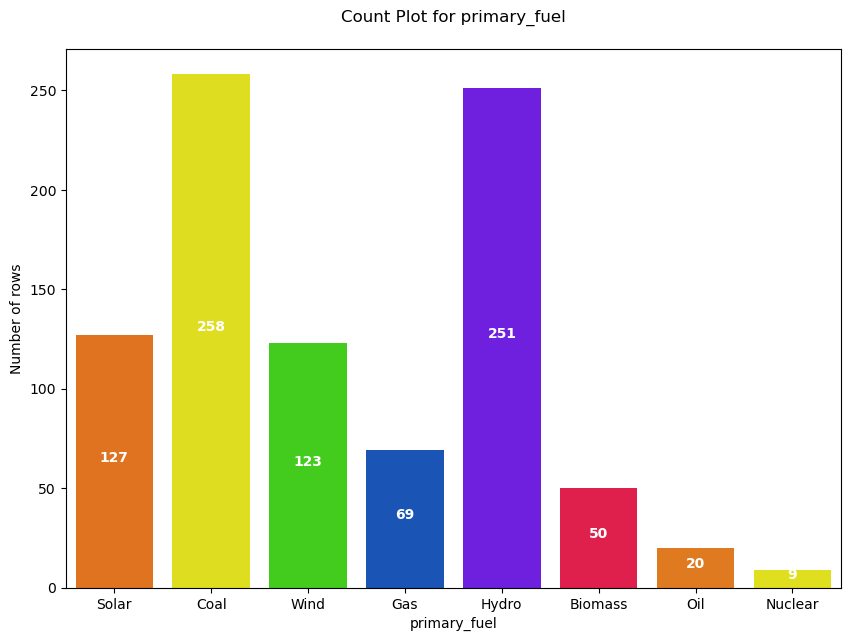

In [32]:
plt.figure(figsize=(10, 7))
col_name = 'primary_fuel'
values = df[col_name].value_counts()

ax = sns.countplot(df[col_name], palette="prism")

index = 0
for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()] / 2, values[i.get_text()],
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1

plt.title(f"Count Plot for {col_name}\n")
plt.ylabel("Number of rows")
plt.show()


#### In above count plot for "primary_fuel" column we can see that the highest number of values have been covered by coal and hydro fuel types then comes solar and wind. Now we can see that gas, biomass, oil and nuclear have very low data counts. Nevertheless when we will be considering "primary_fuel" as our target label then this is impose a class imbalance issue while trying to create a classification model and therefore will need to be treated accordingly.

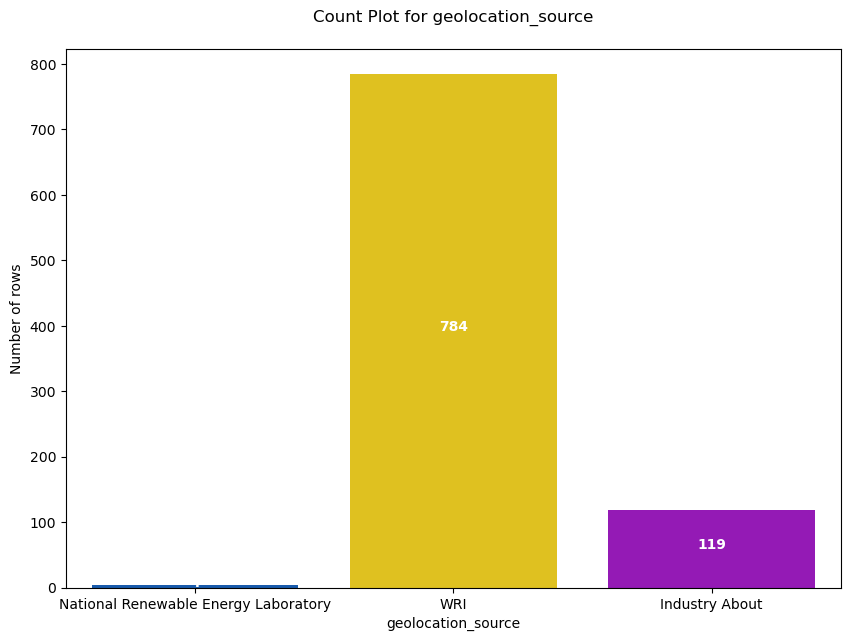

In [33]:
plt.figure(figsize=(10, 7))
col_name = 'geolocation_source'
values = df[col_name].value_counts()

ax = sns.countplot(df[col_name], palette="prism")

index = 0
for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()] / 2, values[i.get_text()],
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1

plt.title(f"Count Plot for {col_name}\n")
plt.ylabel("Number of rows")
plt.show()

#### In above count plot for "geolocation_source" column we see that the highest data value is covered by WRI option and the least value which seems quite negligible has been accumulated by National Renewable Energy Laboratory.

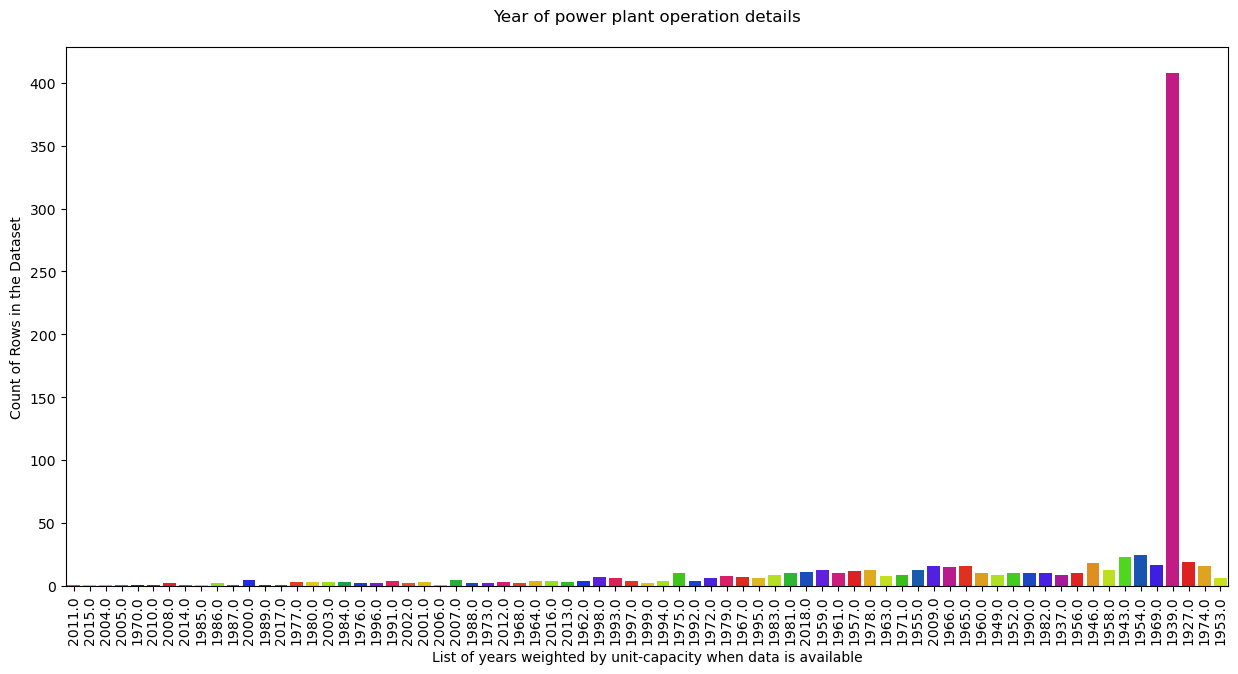

In [35]:
plt.figure(figsize=(15,7))
values = list(df['commissioning_year'].unique())
diag = sns.countplot(df["commissioning_year"], palette="prism")
diag.set_xticklabels(labels=values, rotation=90)
plt.title("Year of power plant operation details\n")
plt.xlabel("List of years weighted by unit-capacity when data is available")
plt.ylabel("Count of Rows in the Dataset")
plt.show()

#### In above count plot we can see the list of years as to when the power plant data was made available

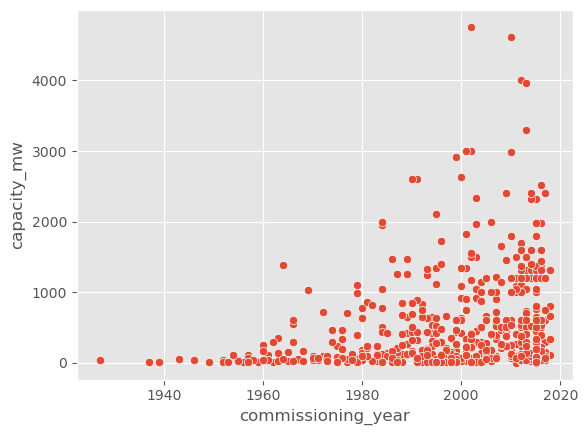

In [36]:
plt.style.use('ggplot')
sns.scatterplot(x = "commissioning_year", y = "capacity_mw", data = df)
plt.show()

#### In above scatter plot we can see that the electricity generating capacity measured in mega watts was pretty low in the olden times as compared to recent years due to the invention of efficient fuel types used for power generation.

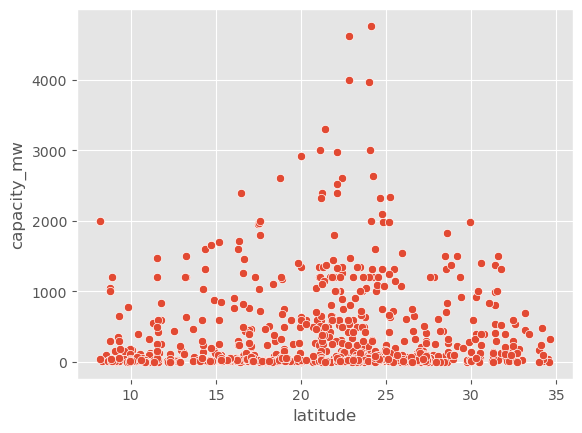

In [37]:
sns.scatterplot(x = "latitude", y = "capacity_mw", data = df)
plt.show()

#### In above scatter plot we can see that the latitude geolocation for electricty generation is highest measuring the mega watts between 20 to 25 decimal degrees.

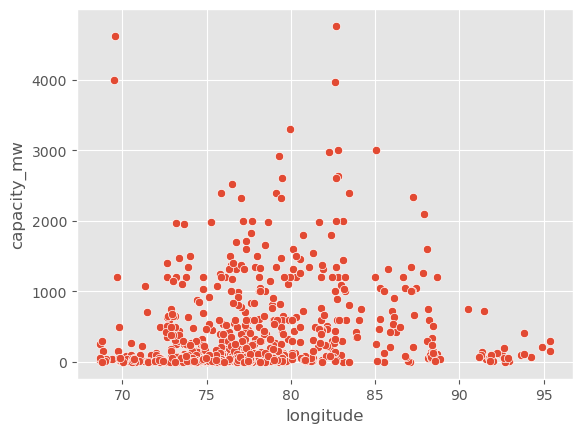

In [38]:
sns.scatterplot(x = "longitude", y = "capacity_mw", data = df)
plt.show()

#### In above scatter plot we can see that the longitude geolocation for electricty generation is highest measuring the mega watts around 70 and then again between 80-85 decimal degrees.

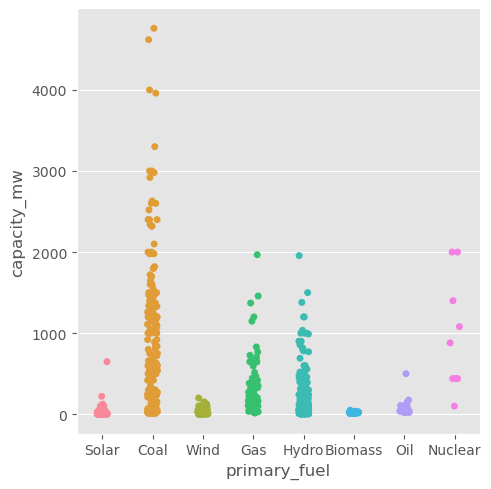

In [40]:
# Set the plotting style
plt.style.use('seaborn-pastel')

# Create the categorical plot using catplot
sns.catplot(x='primary_fuel', y='capacity_mw', data=df)

# Show the plot
plt.show()


#### In above categorical plot we can see that coal is the highest contender when it comes to generating electricity and biomass is used the least.

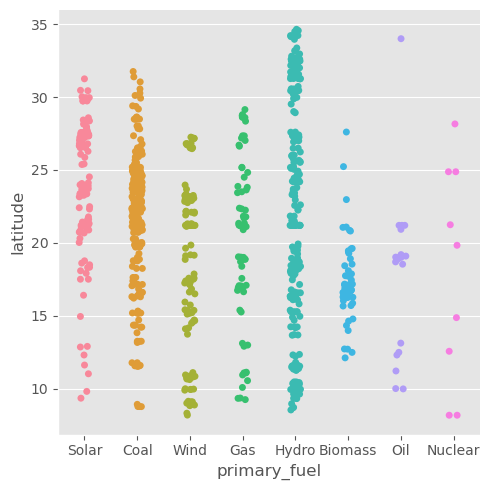

In [41]:
sns.catplot(x = "primary_fuel", y = "latitude", data = df)
plt.show()

#### In above categorical plot we can see that hydro fuel type is distributed across all the latitude values considering the water bodies that help in generating electricity at a power plant.

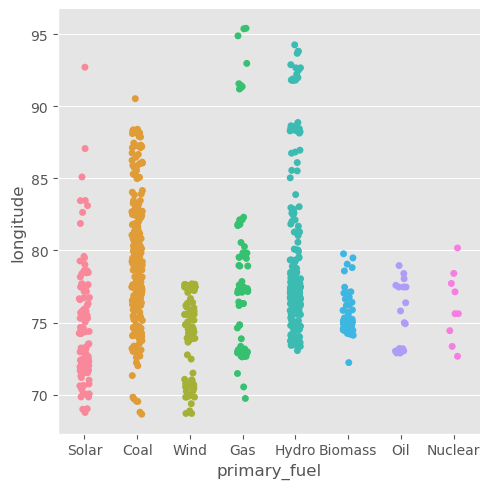

In [42]:
sns.catplot(x = "primary_fuel", y = "longitude", data = df)
plt.show()

#### In above categorical plot we can see that longitude wise decimal degress have quite a splitting data between coal and hydro considering the land lock areas rely on coal for electricity generation and costal area rely mostly on the hydro fuel type. Then we have fuel types solar and wind that are quite comprising when targeted across the longitude values.

# Outliers

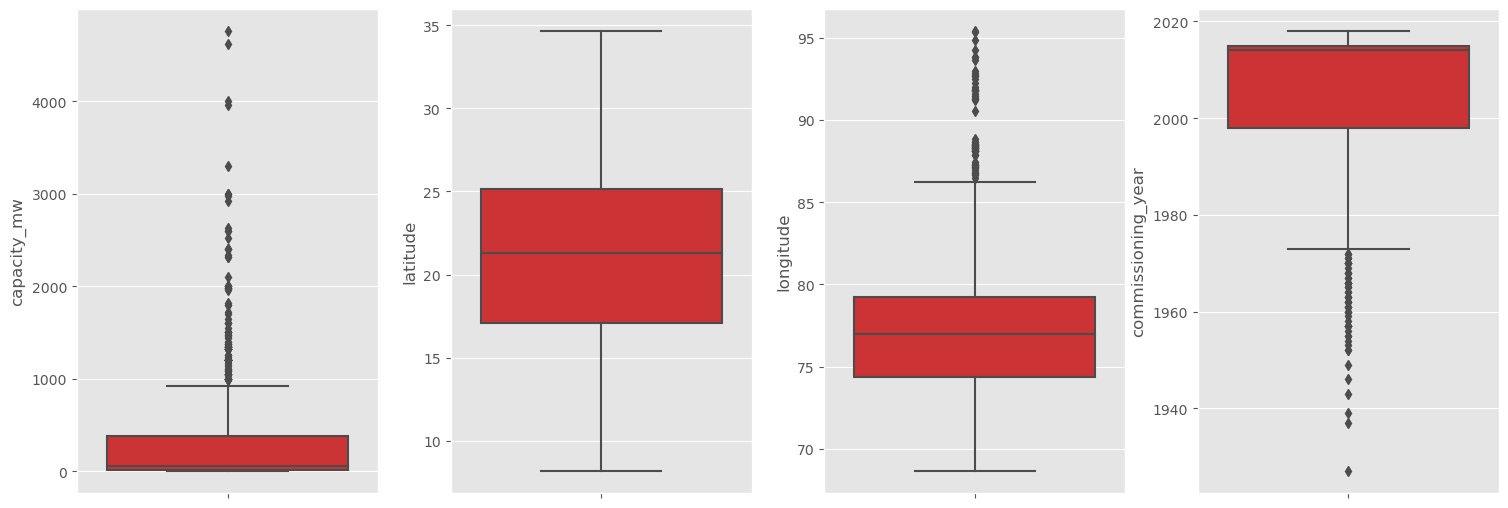

In [46]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[float_datatype].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="Set1")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

#### Above box plot we can see presence of outliers in our numerical columns that will need to be checked before we start building any machine learning model.

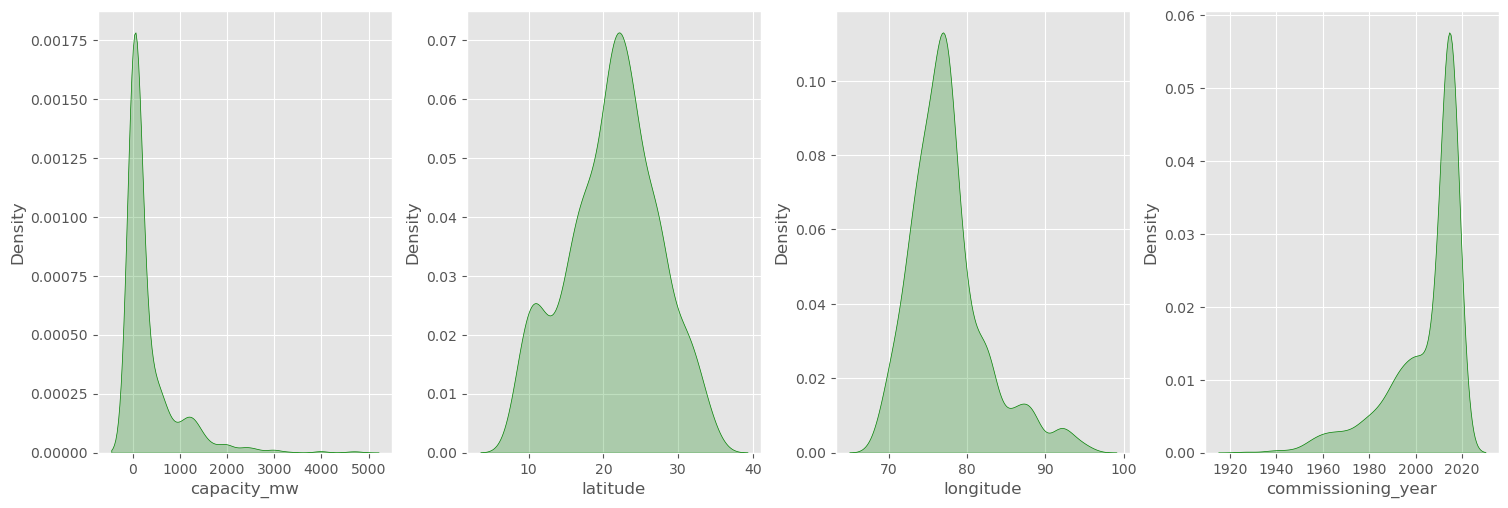

In [49]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[float_datatype].items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

#### Above distribution plot created for our numerical data columns we see skewness and that will need to be treated before we can proceed with our model building process.

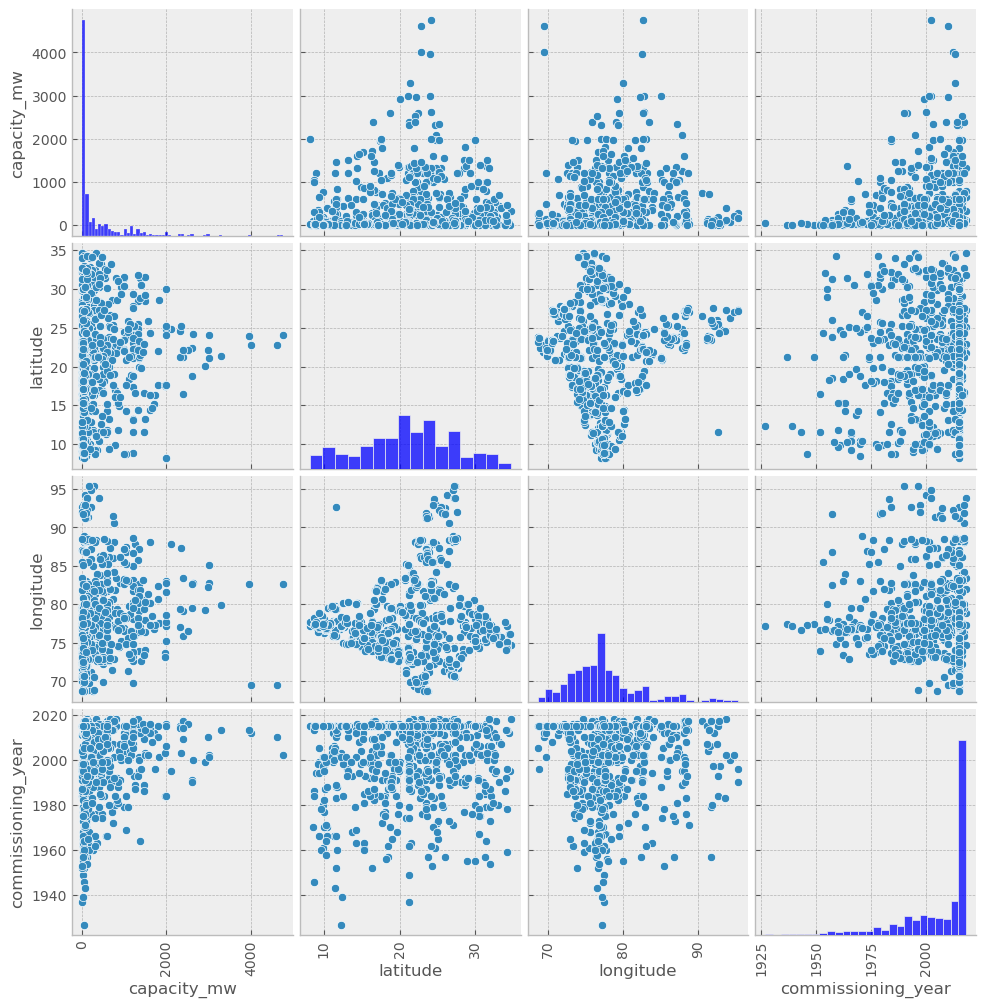

In [50]:
plt.style.use('bmh')
g = sns.pairplot(df)
for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)
plt.show()

#### In above pair plot we can see the data distribution amongst the numerical data type columns.

# Encoding all the object datatype

In [51]:
le = LabelEncoder()
df["primary_fuel"] = le.fit_transform(df["primary_fuel"])
df.head()


,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,1,2015.0,Ultratech Cement ltd,WRI
2,39.2,21.9038,69.3732,7,2015.0,CDM,WRI
3,135.0,23.8712,91.3602,2,2004.0,Central Electricity Authority,WRI
4,1800.0,21.9603,82.4091,1,2015.0,Central Electricity Authority,WRI


#### Applied Label Encoder on our target column "primary_fuel" since we want our labels to be converted from the object datatype to numerical datatype.#

In [52]:
oe = OrdinalEncoder()
df['geolocation_source'] = oe.fit_transform(df['geolocation_source'].values.reshape(-1,1))
df['source'] = oe.fit_transform(df['source'].values.reshape(-1,1))
df.head()


,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.0,109.0,1.0
1,98.0,24.7663,74.6090,1,2015.0,174.0,2.0
2,39.2,21.9038,69.3732,7,2015.0,21.0,2.0
3,135.0,23.8712,91.3602,2,2004.0,22.0,2.0
4,1800.0,21.9603,82.4091,1,2015.0,22.0,2.0


#### Applied the Ordinal Encoder to convert all the categorical feature columns from object datatype to numerical datatype#### Applied the Ordinal Encoder to convert all the categorical feature columns from object datatype to numerical datatype

# Correlation

#### Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.



#### Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

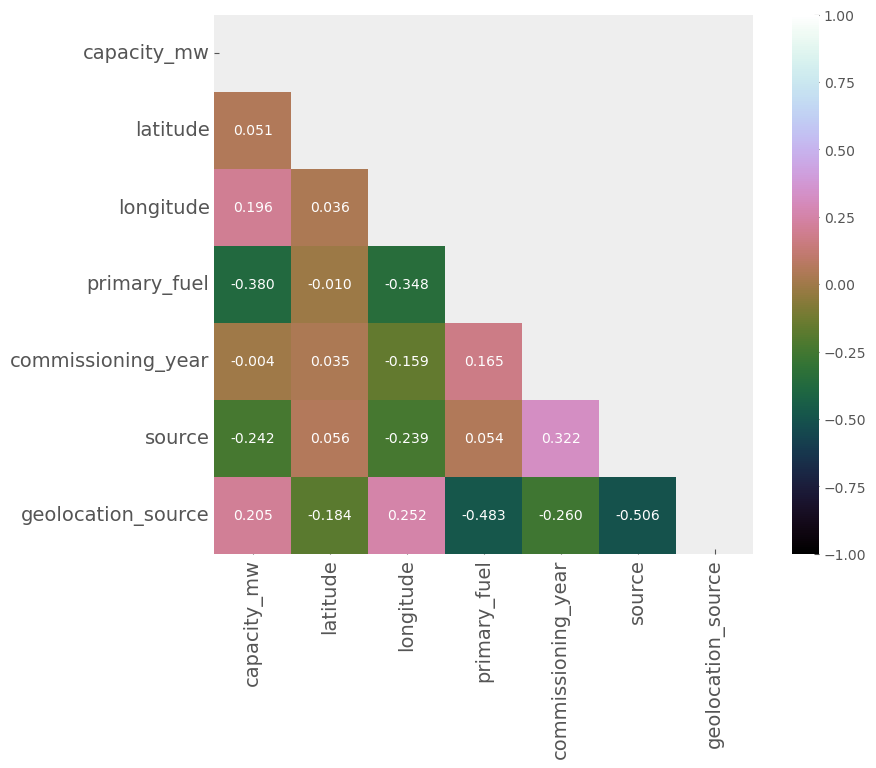

In [54]:

upper_triangle = np.triu(df.corr())
plt.figure(figsize=(10, 7))
sns.heatmap(
    df.corr(),
    vmin=-1,
    vmax=1,
    annot=True,
    square=True,
    fmt='.3f',
    annot_kws={'size': 10},
    cmap='cubehelix',
    mask=upper_triangle
)

# Customize x and y tick label font sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Display the heatmap
plt.show()

#### In above heatmap we can see that our target labels "capacity_mw" and "primary_fuel" has both positive and negative correlations with the remaining feature columns.#### 

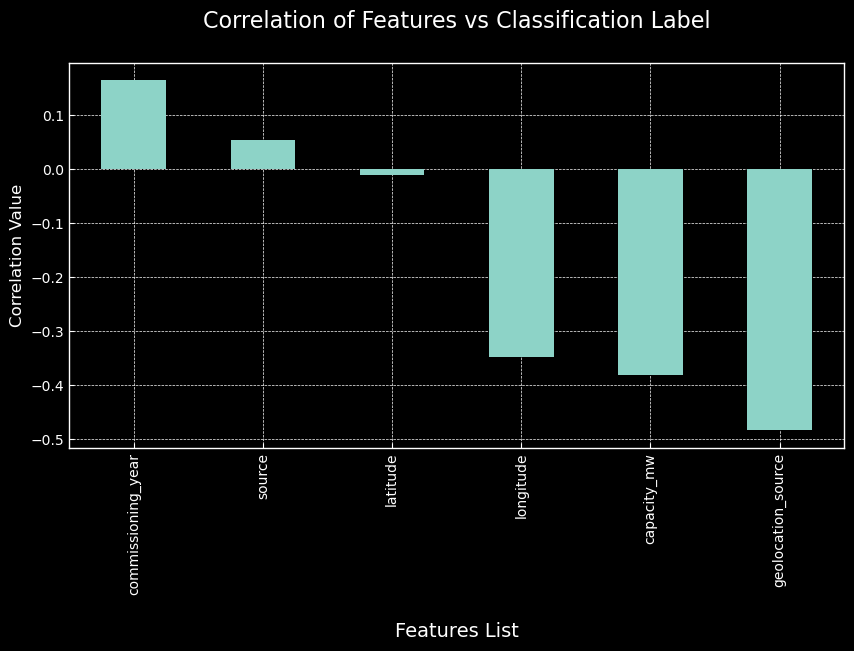

In [55]:
plt.style.use('dark_background')
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['primary_fuel'].sort_values(ascending=False).drop('primary_fuel').plot.bar()
plt.title("Correlation of Features vs Classification Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

#### 2 of them with positive correlation and 4 of them with neagtive correlation.

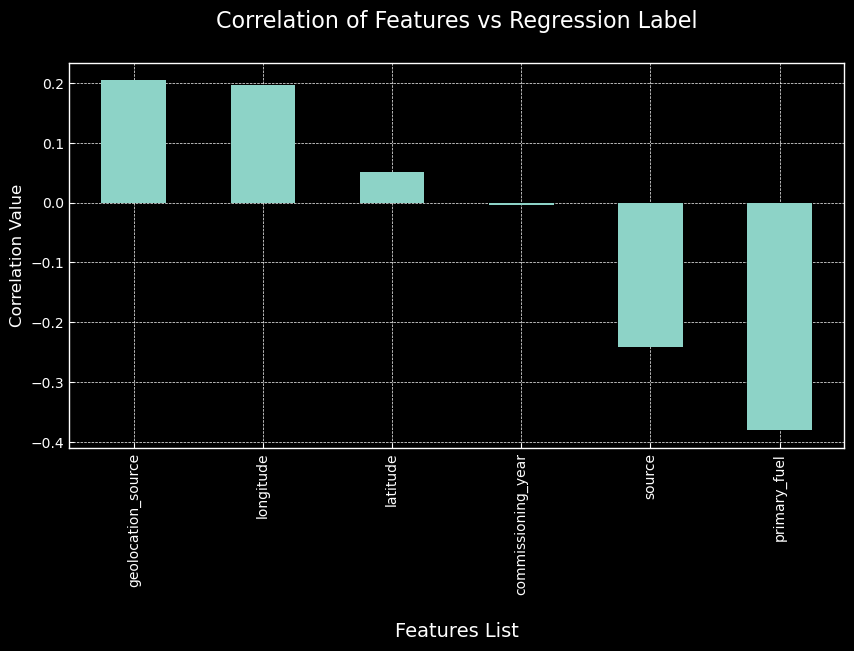

In [56]:
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['capacity_mw'].sort_values(ascending=False).drop('capacity_mw').plot.bar()
plt.title("Correlation of Features vs Regression Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

#### When we consider our regression label "capacity_mw" then we can see the remaining columns that are the features have 4 of them with positive correlation and 2 of them with neagtive correlation.

## Using Z Score to remove outliers

In [58]:
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers:  (907, 7)
Shape of the dataframe after removing outliers:  (838, 7)
Percentage of data loss post outlier removal:  7.6074972436604185


#### Applied the Z score method to remove the outliers since the IQR method was making me lose way more than 10 percent of data which I could not have afforded to lose.

In [59]:
df.skew()

capacity_mw           1.967086
latitude             -0.112601
longitude             0.903442
primary_fuel          0.418559
commissioning_year   -1.500521
source                1.792245
geolocation_source   -2.112259
dtype: float64

#### The "skew" method we see that there are columns present in our dataset that are above the acceptable range of +/-0.5 skewness value.

## Using Log Transform to fix skewness

In [60]:
for col in float_datatype:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

#### Applied Log Transformation on our numerical float datatype columns to ensure that we do not have skewness in our dataset.

In [62]:
X = df.drop('primary_fuel', axis=1)
Y = df['primary_fuel']

In [63]:
#Resolving the class imbalance issue in our label column
Y.value_counts()

1    234
3    222
7    123
6    121
2     64
0     45
5     20
4      9
Name: primary_fuel, dtype: int64

In [64]:
#using the oversampling method.
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

#### "SMOTE" is the over sampling mechanism that we are using to ensure that all the categories present in our target label have the same value.

In [65]:
Y.value_counts()

6    234
1    234
7    234
2    234
3    234
0    234
5    234
4    234
Name: primary_fuel, dtype: int64

## Feature Scaling

In [66]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()


,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source
0,-1.746100,1.449759,-0.848575,0.415867,1.347038,-1.186935
1,0.175795,0.851267,-0.456718,0.734992,2.785334,0.369759
2,-0.342436,0.349984,-1.996499,0.734992,-0.600194,0.369759
3,0.358382,0.694516,3.837180,-0.142602,-0.578066,0.369759
4,1.843892,0.359878,1.649929,0.734992,-0.578066,0.369759


#### Scaling my feature data to ensure that there is no issue with the data biasness over a particular column instead a standardization will occur helping us in having a uniform dataset value.

#### Finding best random state for building Classification Models

In [68]:
maxAccu=0
maxRS=0

for i in range(1, 500):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 73.71794871794873 on Random State 33


#### With random state selection process we have found our lucky number to be 45 amongst 1-500 range.

## Machine Learning Model for Classification with Evaluation Metrics

In [69]:
def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=45)
    
    model.fit(X_train, Y_train)
    
    pred = model.predict(X_test)
    
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

#### Explained class that will perform the train-test split, training of machine learning model, predicting the label value, getting the accuracy score, generating the classification report, getting the cross validation score and the result of difference between the accuracy score and cross validation score for any machine learning model that calls for this function.

In [71]:
model=LogisticRegression()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84        69
           1       0.60      0.53      0.56        47
           2       0.40      0.28      0.33        36
           3       0.60      0.45      0.52        77
           4       0.67      0.88      0.76        64
           5       0.62      0.67      0.64        55
           6       1.00      1.00      1.00        57
           7       0.85      1.00      0.92        63

    accuracy                           0.73       468
   macro avg       0.70      0.71      0.70       468
weighted avg       0.71      0.73      0.72       468

Accuracy Score: 72.86324786324786
Cross Validation Score: 67.73404634581105

Accuracy Score - Cross Validation Score is 5.129201517436812


In [72]:
model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93        69
           1       0.74      0.66      0.70        47
           2       0.54      0.42      0.47        36
           3       0.92      0.71      0.80        77
           4       0.73      1.00      0.84        64
           5       0.84      0.87      0.86        55
           6       1.00      1.00      1.00        57
           7       0.88      1.00      0.93        63

    accuracy                           0.84       468
   macro avg       0.83      0.82      0.82       468
weighted avg       0.85      0.84      0.84       468

Accuracy Score: 84.4017094017094
Cross Validation Score: 80.28834224598931

Accuracy Score - Cross Validation Score is 4.113367155720084


In [73]:
model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        69
           1       0.60      0.66      0.63        47
           2       0.63      0.81      0.71        36
           3       0.92      0.75      0.83        77
           4       0.92      0.92      0.92        64
           5       0.85      0.95      0.90        55
           6       1.00      1.00      1.00        57
           7       1.00      1.00      1.00        63

    accuracy                           0.88       468
   macro avg       0.87      0.87      0.87       468
weighted avg       0.89      0.88      0.88       468

Accuracy Score: 87.82051282051282
Cross Validation Score: 85.7916577540107

Accuracy Score - Cross Validation Score is 2.0288550665021177


In [74]:
model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        69
           1       0.79      0.79      0.79        47
           2       0.67      0.86      0.76        36
           3       0.94      0.78      0.85        77
           4       0.89      1.00      0.94        64
           5       0.94      0.91      0.93        55
           6       1.00      1.00      1.00        57
           7       1.00      1.00      1.00        63

    accuracy                           0.91       468
   macro avg       0.90      0.91      0.90       468
weighted avg       0.92      0.91      0.92       468

Accuracy Score: 91.45299145299145
Cross Validation Score: 90.4395008912656

Accuracy Score - Cross Validation Score is 1.0134905617258596


In [75]:
model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91        69
           1       0.76      0.53      0.62        47
           2       0.44      0.50      0.47        36
           3       0.86      0.57      0.69        77
           4       0.71      0.91      0.79        64
           5       0.80      0.85      0.82        55
           6       0.98      1.00      0.99        57
           7       0.82      0.95      0.88        63

    accuracy                           0.80       468
   macro avg       0.78      0.78      0.77       468
weighted avg       0.81      0.80      0.79       468

Accuracy Score: 79.7008547008547
Cross Validation Score: 80.12848484848485

Accuracy Score - Cross Validation Score is -0.42763014763013985


In [76]:
model=ExtraTreesClassifier()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        69
           1       0.83      0.74      0.79        47
           2       0.74      0.86      0.79        36
           3       0.97      0.84      0.90        77
           4       0.91      0.98      0.95        64
           5       0.96      0.98      0.97        55
           6       1.00      1.00      1.00        57
           7       0.98      1.00      0.99        63

    accuracy                           0.93       468
   macro avg       0.92      0.93      0.92       468
weighted avg       0.93      0.93      0.93       468

Accuracy Score: 93.16239316239316
Cross Validation Score: 91.39978609625669

Accuracy Score - Cross Validation Score is 1.762607066136468


## Hyper parameter tuning on the best Classification ML Model

In [78]:
fmod_param = {'criterion' : ["gini", "entropy"],
              'n_jobs' : [2, 1, -1],
              'min_samples_split' : [2, 3, 4],
              'max_depth' : [20, 25, 30],
              'random_state' : [42, 45, 111]
             }

#### After comparing all the classification models. I have selected Extra Trees Classifier as my best model and have listed down it's parameters above referring the sklearn webpage. The reason behind selecting Extra Trees Classifier is because it got the highest accuracy score plus the cross validation score was even better for this model.

In [79]:
GSCV = GridSearchCV(ExtraTreesClassifier(), fmod_param, cv=5)

#### Applied the Grid Search CV method for hyper parameter tuning my best classification model.

In [80]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 25, 30],
                         'min_samples_split': [2, 3, 4], 'n_jobs': [2, 1, -1],
                         'random_state': [42, 45, 111]})

#### Trained the Grid Search CV with the list of parameters I feel it should check for best possible outcomes.

In [81]:
GSCV.best_params_

{'criterion': 'gini',
 'max_depth': 25,
 'min_samples_split': 4,
 'n_jobs': 2,
 'random_state': 42}

In [82]:
Final_Model = ExtraTreesClassifier(criterion="gini", max_depth=30, min_samples_split=4, n_jobs=2, random_state=42)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 92.94871794871796


In [83]:
y_prob = Classifier.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("="*40)
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.994458 (macro),
0.994650 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.994682 (macro),
0.994875 (weighted by prevalence)


# Confusion Matrix

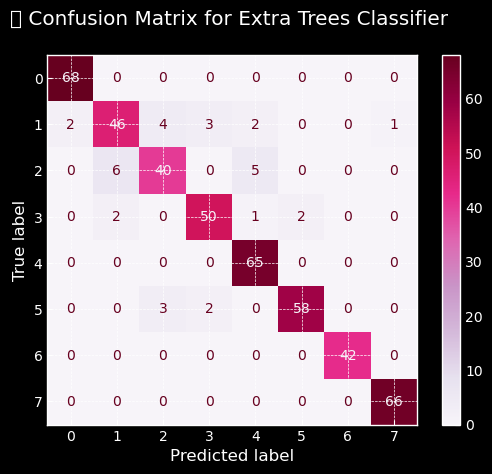

In [85]:
class_names = df.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='PuRd')
plt.title('\t Confusion Matrix for Extra Trees Classifier \n')
plt.show()

#### With the help of above confusion matrix I am able to understand the number of times I got the correct outputs and the number of times my model missed to provide the correct prediction (depicting in the black boxes)

## Saving the best Classification ML model

In [86]:
filename = "FinalModel_Classification_E04.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_Classification_E04.pkl']

#### Now using the best classification model using the joblib library.

#### Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and regression label

In [89]:
X = df.drop('capacity_mw', axis=1)
Y = df['capacity_mw']

#### Separated the dataset into features and regression label where X represents all the feature columns and Y represents the regression target label column.

### Feature Scaling

In [90]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,1.155327,-0.905807,1.174653,0.384586,1.578700,-1.059632
1,0.598448,-0.567933,-0.986874,0.671188,3.125148,0.400848
2,0.132019,-1.895590,1.606958,0.671188,-0.514953,0.400848
3,0.452596,3.134428,-0.554568,-0.116966,-0.491161,0.400848
4,0.141226,1.248497,-0.986874,0.671188,-0.491161,0.400848


#### Applying the Standard Scaler method to normalize my feature values and ensure that my regression model does not have any kind of biasness towards a particular column value.

In [91]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best R2 score is", maxAccu,"on Random State", maxRS)

Best R2 score is 0.5342507568882501 on Random State 672


#### With random state selection process we have found our lucky number to be 135 amongst 1-1000

In [92]:
def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=135)
    
    model.fit(X_train, Y_train)
    
    pred = model.predict(X_test)
    
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

#### Applied regression function that splits the training and testing features and labels, then trains the model, predicts the label, calculates the RMSE score, generates the R2 score, calculates the Cross Validation score and finally finds the difference between the R2 score and Cross Validation score.

In [94]:
model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 1.3160477532281023
R2 Score is: 50.66773177423391
Cross Validation Score: 41.93834317486533
R2 Score - Cross Validation Score is 8.729388599368576


In [95]:
model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, Y)

RMSE Score is: 1.316344547852183
R2 Score is: 50.6454784738563
Cross Validation Score: 41.9648756789894
R2 Score - Cross Validation Score is 8.6806027948669


In [96]:
model=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
reg(model, X, Y)


RMSE Score is: 1.4146177175223145
R2 Score is: 43.00116564812899
Cross Validation Score: 37.38354322322448
R2 Score - Cross Validation Score is 5.617622424904511


In [97]:
model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 1.178192072605417
R2 Score is: 60.4615189911021
Cross Validation Score: 48.73928224288537
R2 Score - Cross Validation Score is 11.72223674821673


In [98]:
model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, Y)

RMSE Score is: 1.7843751560316197
R2 Score is: 9.309849253895308
Cross Validation Score: 18.60204042745478
R2 Score - Cross Validation Score is -9.292191173559473


In [99]:
model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 1.3028997852035429
R2 Score is: 51.64851544394684
Cross Validation Score: 45.998418030428326
R2 Score - Cross Validation Score is 5.650097413518516


In [100]:
KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE Score is: 1.2759824038464744
R2 Score is: 53.625722256729425
Cross Validation Score: 45.908269260377345
R2 Score - Cross Validation Score is 7.71745299635208


In [101]:
model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score is: 1.672748160849392
R2 Score is: 20.301727106604407
Cross Validation Score: 5.227263317175794
R2 Score - Cross Validation Score is 15.074463789428613


In [102]:
model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score is: 1.1671359208810121
R2 Score is: 61.200095287034806
Cross Validation Score: 54.91379554379362
R2 Score - Cross Validation Score is 6.286299743241187


In [103]:
model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score is: 1.0732435863940162
R2 Score is: 67.19164982413494
Cross Validation Score: 62.68886854317899
R2 Score - Cross Validation Score is 4.502781280955951


In [104]:
model=XGBRegressor()
reg(model, X, Y)

RMSE Score is: 1.1700265189512444
R2 Score is: 61.007669002390315
Cross Validation Score: 56.768431000290434
R2 Score - Cross Validation Score is 4.239238002099881


## Hyper parameter tuning on the best Regression ML Model

In [105]:
fmod_param = {'criterion' : ['mse', 'mae'],
              'n_estimators' : [100, 200],
              'min_samples_split' : [2, 3],
              'random_state' : [42, 135],
              'n_jobs' : [-1, 1]
             }

#### After comparing all the regression models I have selected Extra Trees Regressor as my best regression model and have listed down it's parameters above referring the sklearn webpage. I chose Extra Trees Regressor model becuase I feel among all the other regression models it was able to give me a better R2 score and a decent cross validation score for the same.

In [106]:
GSCV = GridSearchCV(ExtraTreesRegressor(), fmod_param, cv=5)

In [107]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 200], 'n_jobs': [-1, 1],
                         'random_state': [42, 135]})

In [108]:
GSCV.best_params_

{'criterion': 'mse',
 'min_samples_split': 3,
 'n_estimators': 200,
 'n_jobs': -1,
 'random_state': 42}

#### Grid Search CV has provided me with the best parameters list out of all the combinations it used to train the model.

In [109]:
Final_Model = ExtraTreesRegressor(criterion='mse', min_samples_split=3, n_estimators=100, n_jobs=-1, random_state=42)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 68.09997386756837


#### Successfully include the Hyper Parameter Tuning on my Final Regression Model and received the R2 score for it.